1. Unlike classification that we did in previous Module -> We don't need to Flatten the input images. The input can be an image, that is further passed to Conv2D layers
2. Always normalize the input images
3. If the model is not working on the training data then we can do the follwing
  * Increase epochs
  * Add more data
  * Data augmentation - for images we can use tensorflow preprocessing for images module
  * Transfer Learning 
4. If the model is overfitting then we can
  * Make the model simpler -> Reduce layers, Reduce # of filters, etc.
  * Add Dropout()
  * Add MaxPool2D()
5. If the model is taking time to run -> Use GPU

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import datetime

## Computer Vision Examples and Code


### Get the Data
Images are from Food101 dataset. 
We have modified this data to only take 2 classe - `pizza` and `steak`

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-08-09 09:41:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.240, 142.250.81.208, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   279MB/s    in 0.4s    

2022-08-09 09:41:42 (279 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()


In [ ]:
zip_ref.close()

### Inspect the data using `os.walk()`

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.


In [ ]:
# Another way
num_steak_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_train

750

### Visualize images 

In [ ]:
import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

def view_random_image(target_dir, target_class):
  target_folder1 = target_dir + "/" + target_class[0]
  random_image1 = random.sample(os.listdir(target_folder1), 1)

  target_folder2 = target_dir + "/" + target_class[1]
  random_image2 = random.sample(os.listdir(target_folder2), 1)
  
  print(random_image1)
  print(random_image2)

  img1 = mpimg.imread(target_folder1 + "/" + random_image1[0])
  img2 = mpimg.imread(target_folder2 + "/" + random_image2[0])

  plt.subplot(1, 2, 1)
  plt.imshow(img1)
  plt.axis("off")
  plt.title(target_class[0])

  plt.subplot(1, 2, 2)
  plt.imshow(img2)
  plt.axis("off")
  plt.title(target_class[1])

  print(f"Shape of the image1:  {img1.shape}")
  print(f"Shape of the image2:  {img2.shape}")

  return img1, img2

['98617.jpg']
['3142045.jpg']
Shape of the image1:  (512, 384, 3)
Shape of the image2:  (512, 512, 3)


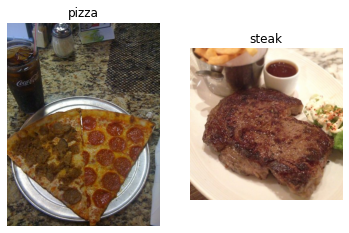

In [ ]:
img1, img2 = view_random_image("pizza_steak/train", class_names)

In [ ]:
img1.shape

(512, 507, 3)

In [ ]:
img2.shape

(512, 512, 3)

### Preprocessing the data (Normalization)

In [ ]:
img1 / 255.

array([[[0.02745098, 0.        , 0.        ],
        [0.03137255, 0.        , 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        ...,
        [0.03529412, 0.01176471, 0.01176471],
        [0.03137255, 0.00784314, 0.00784314],
        [0.03137255, 0.00784314, 0.00784314]],

       [[0.03137255, 0.        , 0.        ],
        [0.03529412, 0.00392157, 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        ...,
        [0.03921569, 0.01568627, 0.01568627],
        [0.03529412, 0.01176471, 0.01176471],
        [0.03529412, 0.01176471, 0.01176471]],

       [[0.03529412, 0.00392157, 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        [0.04313725, 0.01176471, 0.00392157],
        ...,
        [0.03529412, 0.01176471, 0.01176471],
        [0.03529412, 0.01176471, 0.01176471],
        [0.03137255, 0.00784314, 0.00784314]],

       ...,

       [[0.01568627, 0.        , 0.        ],
        [0.01568627, 0.        , 0.        ],
        [0.01960784, 0

### And end-to-end example of CNN

#### Read images using ImageDataGenerator() module

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255.)
valid_datagen = ImageDataGenerator(rescale = 1./255.)

train_dir = '/content/pizza_steak/train'
valid_dir = '/content/pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

#### Tiny VGG - CNN architecture

In [ ]:
model1 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)

history1 = model1.fit(
    train_data, epochs = 5,
    validation_data = valid_data,
    steps_per_epoch = len(train_data),
    validation_steps = len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 0.5780 - binary_accuracy: 0.6927 - val_loss: 0.4489 - val_binary_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4301 - binary_accuracy: 0.8027 - val_loss: 0.3280 - val_binary_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3898 - binary_accuracy: 0.8247 - val_loss: 0.3185 - val_binary_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3577 - binary_accuracy: 0.8520 - val_loss: 0.4692 - val_binary_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3399 - binary_accuracy: 0.8647 - val_loss: 0.3367 - val_binary_accuracy: 0.8720


#### Taking too much time -> Use GPU

In [ ]:
# Time taken on CPU
# Epoch 1/5
# 47/47 [==============================] - 104s 2s/step - loss: 0.6168 - binary_accuracy: 0.6560 - val_loss: 0.4306 - val_binary_accuracy: 0.8220
# Epoch 2/5
# 14/47 [=======>......................] - ETA: 1:02 - loss: 0.4622 - binary_accuracy: 0.8041

### Breaking it down

#### 1. Become one with the data

['3549765.jpg']
['141056.jpg']
Shape of the image1:  (512, 512, 3)
Shape of the image2:  (512, 341, 3)


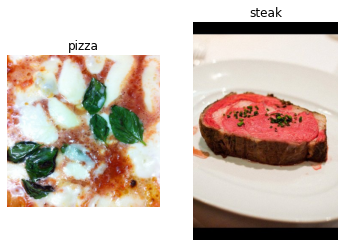

In [ ]:
img1, img2 = view_random_image("pizza_steak/train", class_names)

#### 2. Preprocess and load data

In [ ]:
images, labels =  next(train_data)
len(images), len(labels), len(train_data)

(32, 32, 47)

#### 3. Create the baseline model
**See the model built previously (Tiny VGG)**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, Dropout
from tensorflow.keras import Sequential

#### 4. Whats Going on in a Conv2D layer
Check [CNN explainer](https://poloclub.github.io/cnn-explainer/) and explore

#### 5. Compile and fit the model

In [ ]:
model1.evaluate(valid_data)

16/16 [==============================] - 3s 175ms/step - loss: 0.2700 - binary_accuracy: 0.8800


[0.2700391411781311, 0.8799999952316284]

In [ ]:
def plot_loss_accuracy(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['binary_accuracy']
  val_accuracy = history.history['val_binary_accuracy']

  epochs = len(loss)
  plt.figure()
  plt.plot(range(epochs), loss, c='g', label='train')
  plt.plot(range(epochs), val_loss, c='r', label='val')
  plt.xlabel('epoch')
  plt.title('loss')
  plt.legend()
  plt.show()

  plt.figure()
  plt.plot(range(epochs), accuracy, c='g', label='train')
  plt.plot(range(epochs), val_accuracy, c='r', label='val')
  plt.xlabel('epoch')
  plt.title('accuracy')
  plt.legend()
  plt.show()



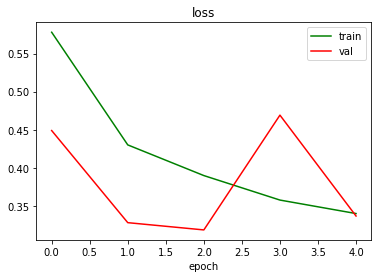

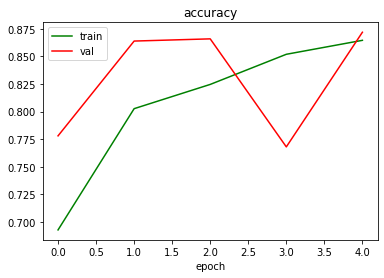

In [ ]:
plot_loss_accuracy(history1)

In [ ]:
#### Model is overfitting -> Here train loss is decreasing but the test loss is increasing

#### Reduce overfitting -> Include Dropout

In [ ]:
model2 = Sequential(
    [
        tf.keras.Input(shape=(224, 224, 3,)),
        Conv2D(10, 3, activation='relu'), # Default padding is 'valid'
        Conv2D(10, 3, activation='relu'), # Default padding is 'valid'
        MaxPool2D(pool_size=2), # Pool size 
        Dropout(0.5),  # Adding dropout for regularization
        Conv2D(10, 3, activation='relu'),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(2),
        Dropout(0.5),
        Flatten(),
        Dense(1, activation='sigmoid')
    ]
)
model2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)

history2 = model2.fit(
    train_data, epochs = 10,
    validation_data = valid_data,
    steps_per_epoch = len(train_data),
    validation_steps = len(valid_data)
)


Epoch 1/10
47/47 [==============================] - 11s 211ms/step - loss: 0.6205 - binary_accuracy: 0.6707 - val_loss: 0.5795 - val_binary_accuracy: 0.7480
Epoch 2/10
47/47 [==============================] - 9s 194ms/step - loss: 0.5398 - binary_accuracy: 0.7473 - val_loss: 0.6109 - val_binary_accuracy: 0.7940
Epoch 3/10
47/47 [==============================] - 9s 195ms/step - loss: 0.5014 - binary_accuracy: 0.7613 - val_loss: 0.5755 - val_binary_accuracy: 0.7220
Epoch 4/10
47/47 [==============================] - 9s 195ms/step - loss: 0.4725 - binary_accuracy: 0.7800 - val_loss: 0.5837 - val_binary_accuracy: 0.7140
Epoch 5/10
47/47 [==============================] - 9s 194ms/step - loss: 0.4552 - binary_accuracy: 0.7920 - val_loss: 0.5169 - val_binary_accuracy: 0.7740
Epoch 6/10
47/47 [==============================] - 9s 192ms/step - loss: 0.4378 - binary_accuracy: 0.8033 - val_loss: 0.4802 - val_binary_accuracy: 0.8420
Epoch 7/10
47/47 [==============================] - 10s 211ms/s

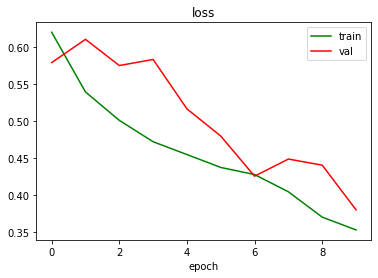

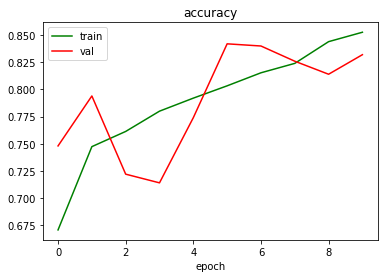

In [ ]:
plot_loss_accuracy(history2)

**Just including the Dropout(0.5) layers, we can see that the val loss is not increasing  now we were able to reduce overfitting** 

#### Data augmentation to reduce overfitting

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Shuffle false only for demo

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
images_normal, labels = next(train_data)
images_aug, labels = next(train_data_augmented)

In [ ]:
images_normal.shape, images_aug.shape

((32, 224, 224, 3), (32, 224, 224, 3))

In [ ]:
labels[:10]

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0.], dtype=float32)

In [ ]:
import random
random.seed(42)

def view_random_image_augmented(train_data, train_data_augmented, target_class):
  
  images, labels = next(train_data)
  images_aug, labels_aug = next(train_data_augmented)

  im_num = random.randint(0, 31)

  plt.subplot(1, 2, 1)
  plt.imshow(images[im_num])
  plt.axis("off")
  plt.title(target_class[int(labels[im_num])])

  plt.subplot(1, 2, 2)
  plt.imshow(images_aug[im_num])
  plt.axis("off")
  plt.title(target_class[int(labels_aug[im_num])])

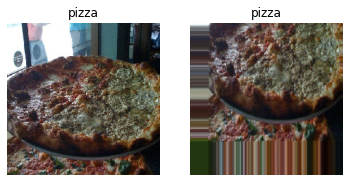

In [ ]:
view_random_image_augmented(train_data, train_data_augmented, class_names)

#### Train the model on augmented data

In [ ]:
model3 = Sequential(
    [
        tf.keras.Input(shape=(224, 224, 3,)),
        Conv2D(10, 3, activation='relu'),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Dropout(0.5),
        Conv2D(10, 3, activation='relu'),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Dropout(0.5),
        Flatten(),
        Dense(1, activation='sigmoid')
    ]
)
model3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)

history3 = model3.fit(
    train_data_augmented, epochs=10,
    validation_data = valid_data,
    steps_per_epoch = len(train_data_augmented),
    validation_steps = len(valid_data)
)

Epoch 1/10
47/47 [==============================] - 23s 483ms/step - loss: 0.8153 - binary_accuracy: 0.5500 - val_loss: 0.6919 - val_binary_accuracy: 0.5480
Epoch 2/10
47/47 [==============================] - 22s 476ms/step - loss: 0.7037 - binary_accuracy: 0.5600 - val_loss: 0.6857 - val_binary_accuracy: 0.6060
Epoch 3/10
47/47 [==============================] - 23s 500ms/step - loss: 0.6972 - binary_accuracy: 0.4740 - val_loss: 0.6862 - val_binary_accuracy: 0.5060
Epoch 4/10
47/47 [==============================] - 22s 471ms/step - loss: 0.6858 - binary_accuracy: 0.5940 - val_loss: 0.6799 - val_binary_accuracy: 0.7140
Epoch 5/10
47/47 [==============================] - 22s 470ms/step - loss: 0.6902 - binary_accuracy: 0.5627 - val_loss: 0.6792 - val_binary_accuracy: 0.6800
Epoch 6/10
47/47 [==============================] - 22s 474ms/step - loss: 0.6665 - binary_accuracy: 0.6027 - val_loss: 0.6630 - val_binary_accuracy: 0.6960
Epoch 7/10
47/47 [==============================] - 22s 47

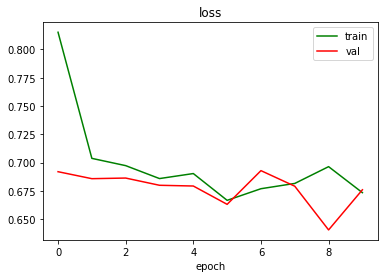

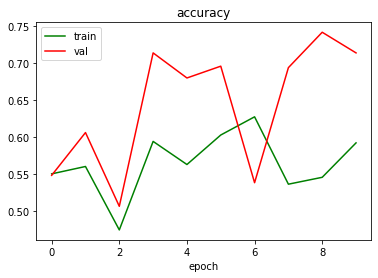

In [ ]:
plot_loss_accuracy(history3)

**The accuracy and loss are going all over the place, we might have made it too hard for the model to learn because of too many data augmentations**.
Lets remove some of the data augmentation and before that lets introduce shuffle into the data augmentation step

#### Train on augmented shuffled data

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model4 = Sequential(
    [
        tf.keras.Input(shape=(224, 224, 3,)),
        Conv2D(10, 3, activation='relu'),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Dropout(0.5),
        Conv2D(10, 3, activation='relu'),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Dropout(0.5),
        Flatten(),
        Dense(1, activation='sigmoid')
    ]
)
model4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)

history4 = model4.fit(
    train_data_augmented_shuffled, epochs=10,
    validation_data = valid_data,
    steps_per_epoch = len(train_data_augmented_shuffled),
    validation_steps = len(valid_data)
)

Epoch 1/10
47/47 [==============================] - 37s 494ms/step - loss: 0.6649 - binary_accuracy: 0.6067 - val_loss: 0.6037 - val_binary_accuracy: 0.6960
Epoch 2/10
47/47 [==============================] - 22s 479ms/step - loss: 0.6153 - binary_accuracy: 0.6667 - val_loss: 0.5801 - val_binary_accuracy: 0.7380
Epoch 3/10
47/47 [==============================] - 23s 494ms/step - loss: 0.5755 - binary_accuracy: 0.7207 - val_loss: 0.5278 - val_binary_accuracy: 0.7880
Epoch 4/10
47/47 [==============================] - 23s 479ms/step - loss: 0.5412 - binary_accuracy: 0.7253 - val_loss: 0.5204 - val_binary_accuracy: 0.7080
Epoch 5/10
47/47 [==============================] - 23s 492ms/step - loss: 0.5177 - binary_accuracy: 0.7340 - val_loss: 0.5024 - val_binary_accuracy: 0.7340
Epoch 6/10
47/47 [==============================] - 22s 476ms/step - loss: 0.5263 - binary_accuracy: 0.7327 - val_loss: 0.4284 - val_binary_accuracy: 0.8100
Epoch 7/10
47/47 [==============================] - 23s 47

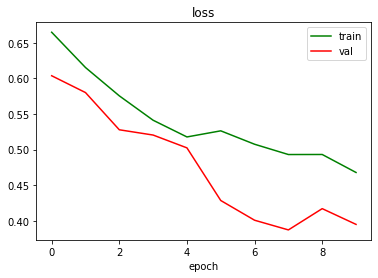

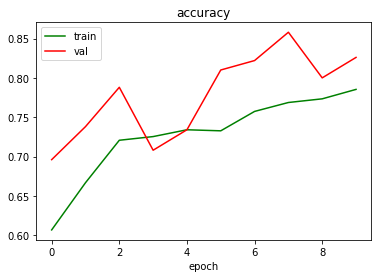

In [ ]:
plot_loss_accuracy(history4)

**We can see here that the model has improved much on the training data just by introducing shuffle in the data augmentation. This is because intially the model was looking at the images of only pizza and learned that in every epoch and that it was adjusting the weights after seeing the steak images. But since we have added shuffle, the model is now looking at both types of images one by one and learning simultaneously, hence model is performing well on the train data**

#### Exploring options to improve the model
1. Add more layers
2. Increase filters
3. Train for longer
4. Find ideal learning rate
5. More data
6. Transfer learning 


### Testing performance on a test image
Download an image and see what the model outputs

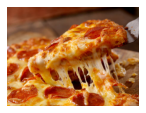

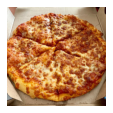

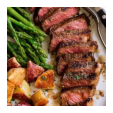

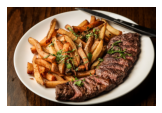

In [ ]:
img1 = mpimg.imread('/content/from_internet/pizza/pizza1.jpg')
img2 = mpimg.imread('/content/from_internet/pizza/pizza2.jpg')
img3 = mpimg.imread('/content/from_internet/steak/steak1.jpg')
img4 = mpimg.imread('/content/from_internet/steak/steak2.jpg')

eval('img' + str(1))

plt.figure()
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(eval('img' + str(i+1)))
  plt.axis(False)
  plt.show();

#### Load and process image for prediction


In [ ]:
def load_and_process(filename, size):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[size, size])
  img = img / 255.
  img = tf.expand_dims(img, axis=0)
  return img

In [ ]:
img = load_and_process('/content/from_internet/pizza/pizza1.jpg', 224)

In [ ]:
img.shape

TensorShape([1, 224, 224, 3])

In [ ]:
model4.predict(img)

array([[0.21770029]], dtype=float32)

In [ ]:
#### This is binary classification probabiity -> Lets decode it

#### Decode the binary classification probability

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred = model4.predict(img)
pred = np.squeeze(np.round(pred)).astype(int)
class_names[pred]

'pizza'

In [ ]:
def show_image_and_prediction(filename, size, model, class_names):
  img = load_and_process(filename, size)
  pred = model.predict(img)
  
  ## These 2 lines are for printing the probability in the title
  probability = np.round(pred, 2)
  probability = np.squeeze(probability)
  
  pred = np.squeeze(np.round(pred)).astype(int)
  predicted_class = class_names[pred]

  if predicted_class == 'pizza':
    probability = 1.0 - probability

  # For showing the image
  img_show = mpimg.imread(filename)

  plt.figure()
  plt.imshow(img_show)
  plt.title(predicted_class + ' with probability ' + str(probability))
  plt.axis(False)
  plt.show()

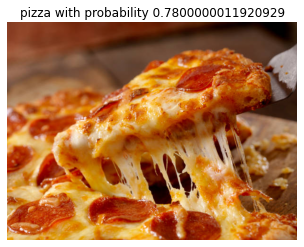

In [ ]:
show_image_and_prediction('/content/from_internet/pizza/pizza1.jpg', 224, model4, class_names)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

--2022-08-09 10:54:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.01s   

2022-08-09 10:54:56 (245 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-08-09 10:55:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2022-08-09 10:55:24 (174 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png

--2022-08-09 10:55:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1851410 (1.8M) [image/png]
Saving to: ‘03-simple-convnet.png’

03-simple-convnet.p 100%[===================>]   1.77M  --.-KB/s    in 0.009s  

2022-08-09 10:55:35 (198 MB/s) - ‘03-simple-convnet.png’ saved [1851410/1851410]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-08-09 10:55:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2022-08-09 10:55:56 (199 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-08-09 10:56:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.009s  

2022-08-09 10:56:04 (179 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]



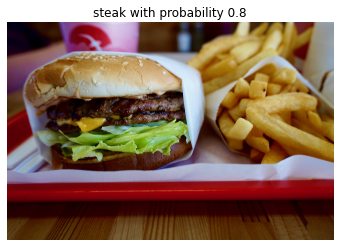

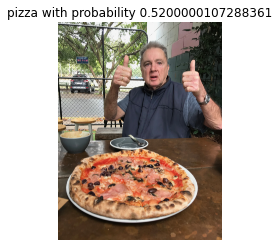

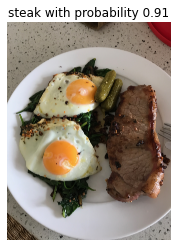

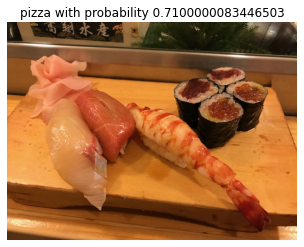

In [ ]:
show_image_and_prediction('03-hamburger.jpeg', 224, model4, class_names)
show_image_and_prediction('03-pizza-dad.jpeg', 224, model4, class_names)
show_image_and_prediction('03-steak.jpeg', 224, model4, class_names)
show_image_and_prediction('03-sushi.jpeg', 224, model4, class_names)

## Multi-class classification

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-09 12:25:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.217.164.144, 142.251.45.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   167MB/s    in 3.0s    

2022-08-09 12:25:57 (167 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 10 directories and 0 ima

In [ ]:
train_dir = '10_food_classes_all_data/train/'
valid_dir = '10_food_classes_all_data/test/'

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

def view_random_image(target_dir):
  target_class = random.choice(class_names)
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.axis("off")
  plt.title(target_class)

  print(f"Shape of the image:  {img.shape}")

  return img

['355266.jpg']
Shape of the image:  (512, 378, 3)


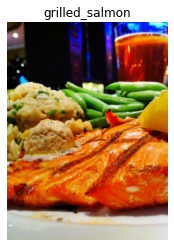

In [ ]:
img = view_random_image(train_dir)

### Preprocess the images -> ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen_augmented = ImageDataGenerator(rescale = 1./255.,
                                             zoom_range=0.2,
                                             shear_range=0.2
                                             )

valid_datagen = ImageDataGenerator(rescale = 1./255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42,
                                               shuffle=True)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42,
                                               shuffle=True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create Tiny VGG and train

In [ ]:
model_multi_class1 = Sequential(
    [
        tf.keras.Input(shape=(224, 224, 3, )),
        Conv2D(10, 3, activation='relu'),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Dropout(0.5),
        Conv2D(10, 3, activation='relu'),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Dropout(0.5),
        Flatten(),
        Dense(10, activation='softmax')
    ]
)
model_multi_class1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.CategoricalAccuracy()]
)

history1 = model_multi_class1.fit(
    train_data_augmented,
    epochs=10,
    validation_data = valid_data,
    steps_per_epoch = len(train_data_augmented),
    validation_steps = len(valid_data)
)

Epoch 1/10
235/235 [==============================] - 107s 452ms/step - loss: 2.1773 - categorical_accuracy: 0.1905 - val_loss: 2.1235 - val_categorical_accuracy: 0.2228
Epoch 2/10
235/235 [==============================] - 106s 451ms/step - loss: 2.0713 - categorical_accuracy: 0.2520 - val_loss: 2.0624 - val_categorical_accuracy: 0.2540
Epoch 3/10
235/235 [==============================] - 105s 449ms/step - loss: 1.9874 - categorical_accuracy: 0.3015 - val_loss: 1.9557 - val_categorical_accuracy: 0.3016
Epoch 4/10
235/235 [==============================] - 106s 450ms/step - loss: 1.9286 - categorical_accuracy: 0.3253 - val_loss: 1.9287 - val_categorical_accuracy: 0.3212
Epoch 5/10
235/235 [==============================] - 106s 449ms/step - loss: 1.8713 - categorical_accuracy: 0.3552 - val_loss: 1.9032 - val_categorical_accuracy: 0.3356
Epoch 6/10
235/235 [==============================] - 106s 452ms/step - loss: 1.8332 - categorical_accuracy: 0.3705 - val_loss: 1.8983 - val_categoric

### Evaluate the model

In [ ]:
def plot_loss_accuracy(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['categorical_accuracy']
  val_accuracy = history.history['val_categorical_accuracy']

  epochs = len(loss)
  plt.figure()
  plt.plot(range(epochs), loss, c='g', label='train')
  plt.plot(range(epochs), val_loss, c='r', label='val')
  plt.xlabel('epoch')
  plt.title('loss')
  plt.legend()
  plt.show()

  plt.figure()
  plt.plot(range(epochs), accuracy, c='g', label='train')
  plt.plot(range(epochs), val_accuracy, c='r', label='val')
  plt.xlabel('epoch')
  plt.title('accuracy')
  plt.legend()
  plt.show()

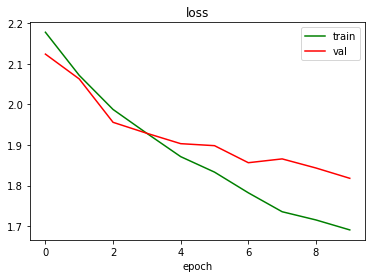

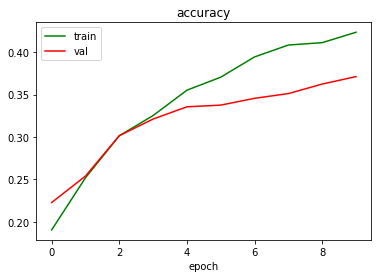

In [ ]:
plot_loss_accuracy(history1)

In [ ]:
model_multi_class1.evaluate(valid_data)

79/79 [==============================] - 10s 131ms/step - loss: 1.8180 - categorical_accuracy: 0.3712


[1.8180136680603027, 0.37119999527931213]

### Next steps
1. Restructure architecture
2. Learning rate
3. Train longer
4. Fit on more data
5. Transfer Learning 

### Make predictions with custom images


In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
def view_image_and_prediction(filename, size, model, class_names):
  img = load_and_process(filename, size)
  pred = model.predict(img)
  
  ## These 2 lines are for printing the probability in the title
  
  probability = np.squeeze(pred)
  probability = probability[np.argmax(probability)]
  probability = np.round(probability, 2)

  pred = np.squeeze(pred)
  pred = np.argmax(pred)
  predicted_class = class_names[pred]

  # pred = np.squeeze(np.round(pred)).astype(int)
  # predicted_class = class_names[pred]

  # if predicted_class == 'pizza':
  #   probability = 1.0 - probability

  # For showing the image
  img_show = mpimg.imread(filename)

  plt.figure()
  plt.imshow(img_show)
  plt.title(predicted_class + ' with probability ' + str(probability))
  plt.axis(False)
  plt.show()

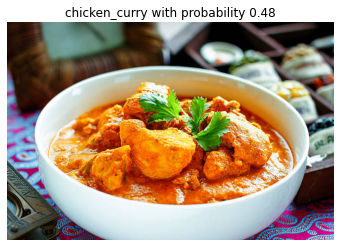

In [ ]:
view_image_and_prediction('/content/03-chicken_curry.jpeg', 224, model_multi_class1, class_names)

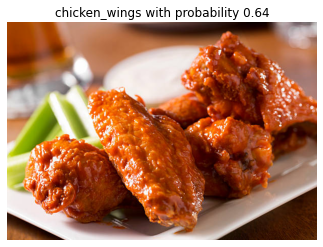

In [ ]:
view_image_and_prediction('/content/03-chicken_wings.jpeg', 224, model_multi_class1, class_names)

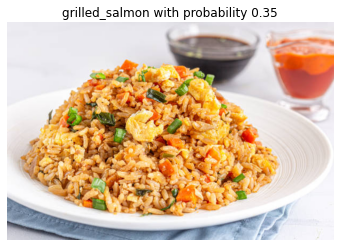

In [ ]:
view_image_and_prediction('/content/03-fried-rice.jpeg', 224, model_multi_class1, class_names)

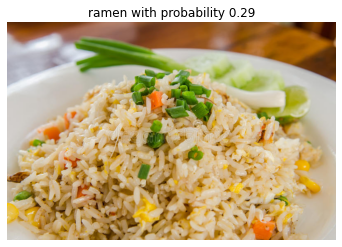

In [ ]:
view_image_and_prediction('/content/03-fried-rice2.jpeg', 224, model_multi_class1, class_names)

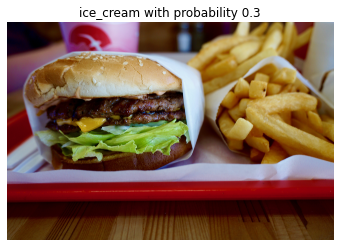

In [ ]:
view_image_and_prediction('/content/03-hamburger.jpeg', 224, model_multi_class1, class_names)

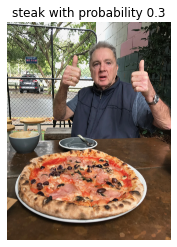

In [ ]:
view_image_and_prediction('/content/03-pizza-dad.jpeg', 224, model_multi_class1, class_names)

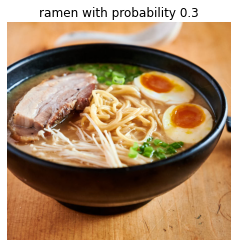

In [ ]:
view_image_and_prediction('/content/03-ramen.jpeg', 224, model_multi_class1, class_names)

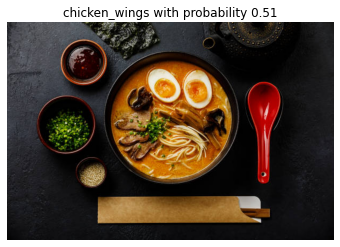

In [ ]:
view_image_and_prediction('/content/03-ramen2.jpeg', 224, model_multi_class1, class_names)

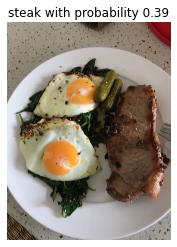

In [ ]:
view_image_and_prediction('/content/03-steak.jpeg', 224, model_multi_class1, class_names)

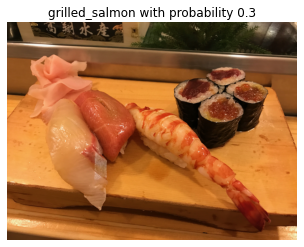

In [ ]:
view_image_and_prediction('/content/03-sushi.jpeg', 224, model_multi_class1, class_names)

### Save the model

In [ ]:
model_multi_class1.save("multi_class_image_classification_food_101")

INFO:tensorflow:Assets written to: multi_class_image_classification_food_101/assets


INFO:tensorflow:Assets written to: multi_class_image_classification_food_101/assets


In [ ]:
!cp -r '/content/multi_class_image_classification_food_101' '/content/drive/MyDrive/Colab Notebooks/'